<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Euronext_Brussels(BEL20)_INDEX_mathclasstutor_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BEL 20  INDEX Euronext Brussels

In [14]:
!pip install yfinance

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [49]:
df = yf.download('^BFX',
start='1985-01-01',
end='2022-04-19',
progress=False)


In [17]:
df['simple_rtn'] =df.Close.pct_change()

In [18]:
df['log_rtn'] = np.log(df.Close/df.Close.shift(1))

In [19]:
df[['simple_rtn','log_rtn']].tail(20)

,simple_rtn,log_rtn
Date,,
2022-03-18,0.008921,0.008881
2022-03-21,-0.004316,-0.004325
2022-03-22,0.009517,0.009472
2022-03-23,-0.009513,-0.009559
2022-03-24,-0.003650,-0.003656
2022-03-25,0.001288,0.001287
2022-03-28,0.002794,0.002790
2022-03-29,0.016117,0.015989
2022-03-30,0.000329,0.000329


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d88958290>],
      dtype=object)

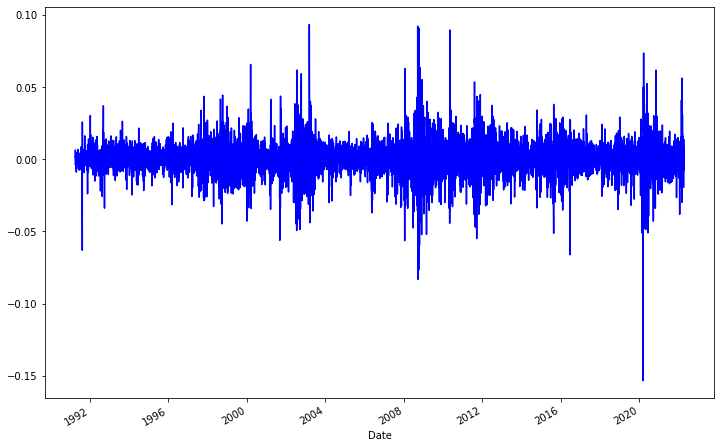

In [20]:
df['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [21]:
def realized_volatility(x):
 return np.sqrt(np.sum(x**2))
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
df_rv.rv = df_rv.rv * np.sqrt(12)

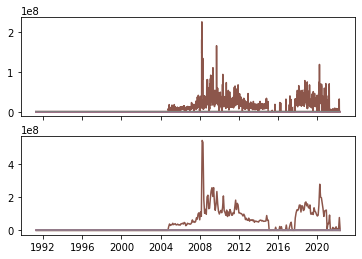

In [22]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

In [50]:
df['simple_rtn'] =df.Close.pct_change()
df['log_rtn'] = np.log(df.Close/df.Close.shift(1))

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

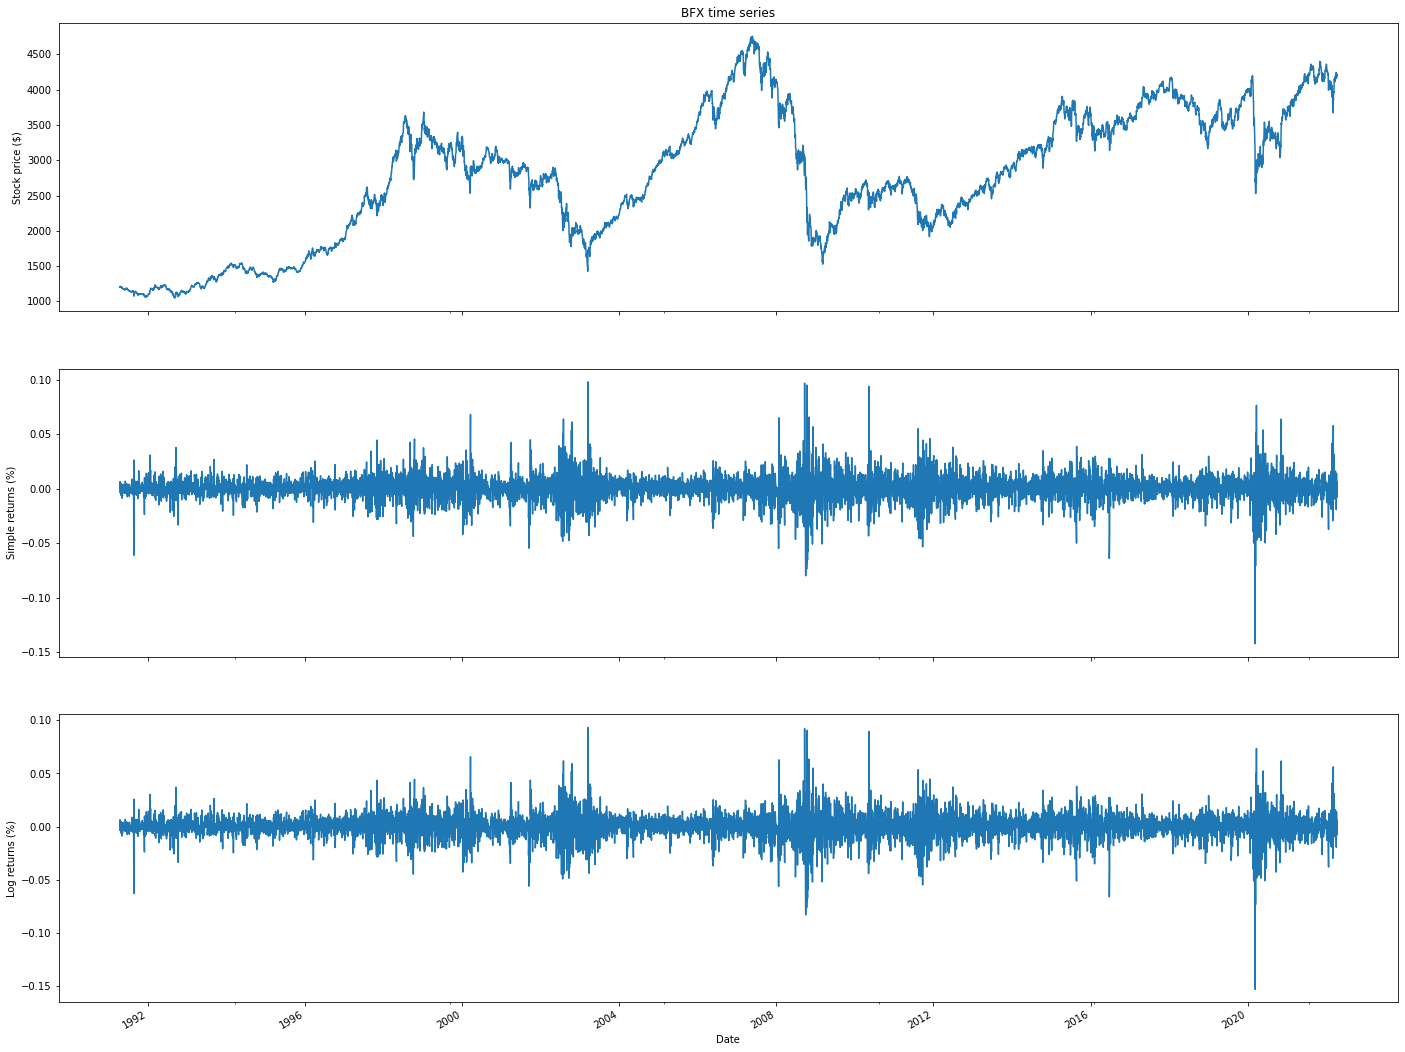

In [52]:
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
df.Close.plot(ax=ax[0])
ax[0].set(title = 'BFX time series',
ylabel = 'Stock price ($)')
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date',
ylabel = 'Log returns (%)')

In [53]:
def realized_volatility(x):
 return np.sqrt(np.sum(x**2))
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
df_rv.rv = df_rv.rv * np.sqrt(12)

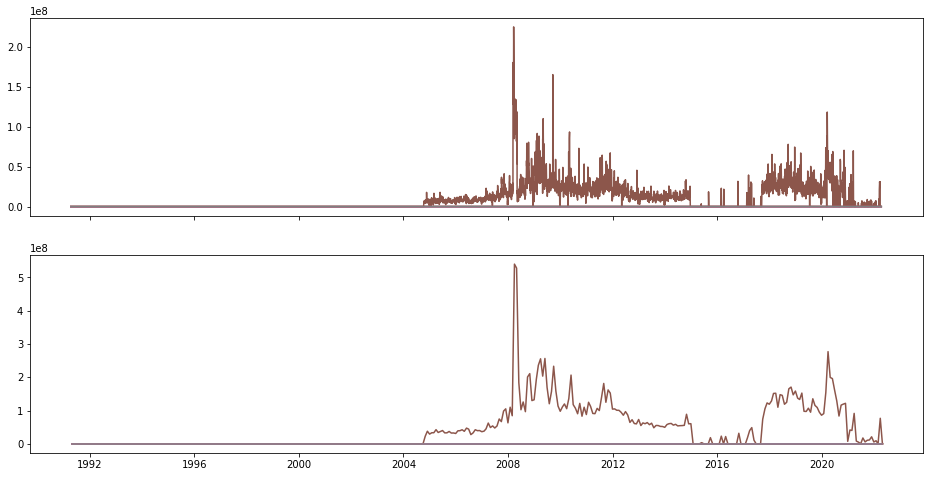

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv);

In [ ]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [24]:
df = yf.download('^BFX',
start='1985-01-01',
end='2022-04-19',
progress=False)

In [26]:
df['simple_rtn'] =df.Close.pct_change()
df['log_rtn'] = np.log(df.Close/df.Close.shift(1))

In [27]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [28]:
df_outliers = df.join(df_rolling)

In [29]:
def indentify_outliers(row, n_sigmas=3):
   x = row['simple_rtn']
   mu = row['mean']
   sigma = row['std']
   if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
    return 1
   else:
    return 0

In [30]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers,
axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1,
['simple_rtn']]

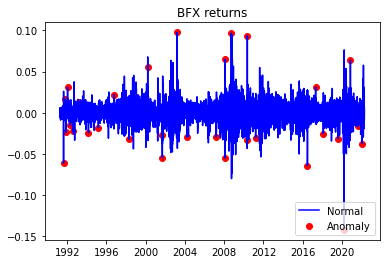

In [31]:
fig, ax = plt.subplots()
ax.plot(df_outliers.index, df_outliers.simple_rtn,
color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn,
color='red', label='Anomaly')
ax.set_title("BFX returns")
ax.legend(loc='lower right')

In [32]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


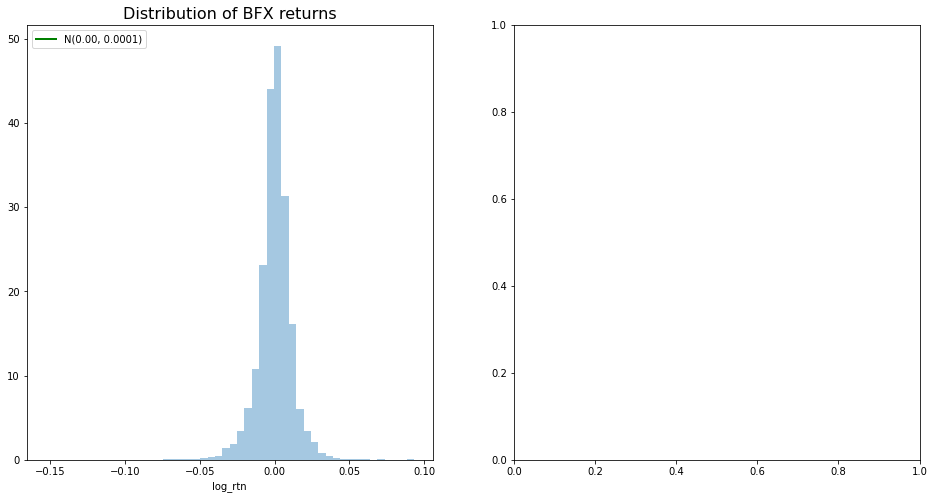

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of BFX returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

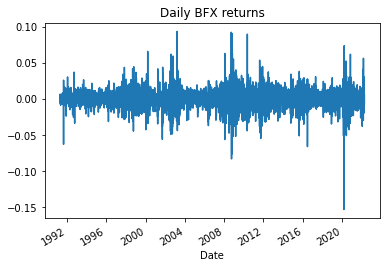

In [34]:
df.log_rtn.plot(title='Daily BFX returns')

In [35]:
df = yf.download(['^BFX', '^VIX'],
start='1985-01-01',
end='2022-04-19',
progress=False)

In [36]:
df.tail()

Adj Close                   Close                    High  \
                   ^BFX       ^VIX         ^BFX       ^VIX         ^BFX   
Date                                                                      
2022-04-11  4188.000000  24.370001  4188.000000  24.370001  4213.129883   
2022-04-12  4185.029785  24.260000  4185.029785  24.260000  4195.089844   
2022-04-13  4192.129883  21.820000  4192.129883  21.820000  4193.819824   
2022-04-14  4216.290039  22.700001  4216.290039  22.700001  4220.680176   
2022-04-18          NaN  22.170000          NaN  22.170000          NaN   

                               Low                    Open             Volume  \
                 ^VIX         ^BFX       ^VIX         ^BFX       ^VIX    ^BFX   
Date                                                                            
2022-04-11  24.420000  4178.899902  22.090000  4198.580078  23.090000  5400.0   
2022-04-12  25.379999  4124.870117  22.270000  4139.709961  24.940001  6300.0   
2022-04-13  24.450001  4163.950195  21.370001  4168.890137  23.520000  4900.0   
2022-04-14  22.700001  4187.390137  20.850000  4193.509766  21.719999  5300.0   
2022-04-18  24.600000          NaN  21.980000          NaN  24.520000     NaN   

                 
           ^VIX  
Date             
2022-04-11  0.0  
2022-04-12  0.0  
2022-04-13  0.0  
2022-04-14  0.0  
2022-04-18  0.0

In [37]:
df = df[['Adj Close']]

In [38]:
df.tail()

Adj Close           
                   ^BFX       ^VIX
Date                              
2022-04-11  4188.000000  24.370001
2022-04-12  4185.029785  24.260000
2022-04-13  4192.129883  21.820000
2022-04-14  4216.290039  22.700001
2022-04-18          NaN  22.170000

In [39]:
df.columns = df.columns.droplevel(0)

In [41]:
df = df.rename(columns={'^BFX': 'bfx', '^VIX': 'vix'})

In [42]:
df['log_rtn'] = np.log(df.bfx / df.bfx.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))

In [43]:
df.dropna(how='any', axis=0, inplace=True)

In [44]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'BFX log returns'),
 Text(0.5, 1.0, 'BFX vs. VIX ($\\rho$ = -0.40)')]

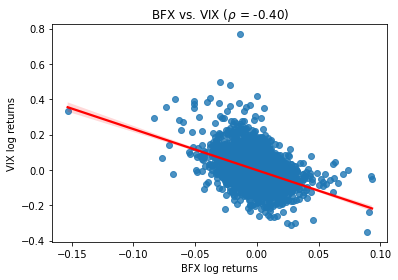

In [45]:
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'BFX vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='BFX log returns')